[View in Colaboratory](https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/image_trail.ipynb)

In [2]:
!pip install scikit-video

    100% |████████████████████████████████| 2.3MB 5.5MB/s 


In [8]:
!apt-get install ffmpeg  

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dbus i965-va-driver libaacs0 libapparmor1 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2
  libboost-filesystem1.62.0 libboost-system1.62.0 libbs2b0 libcaca0 libcairo2
  libcapnp-0.5.3 libcdio-cdda1 libcdio-paranoia1 libcdio13 libchromaprint1
  libcrystalhd3 libdbus-1-3 libdc1394-22 libdrm-amdgpu1 libdrm-common
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libdrm2 libegl1-mesa libelf1
  libfftw3-double3 libflac8 libflite1 libfribidi0 libgbm1 libgl1-mesa-dri
  libgl1-mesa-glx libglapi-mesa libgme0 libgraphite2-3 libgsm1 libharfbuzz0b
  libiec61883-0 libjack-jackd2-0 libllvm5.0 libmirclient9 libmircommon7
  libmircore1 libmirprotobuf3 libmp3lame0 libmpg123-0 libnuma1 libogg0
  libopenal-data libopenal1 libopencv-core3.1 l

In [0]:
import skvideo.io
import numpy as np

In [0]:
video_fname='VID_20180930_193148_2.mp4'

In [6]:
video_data = skvideo.io.vread(video_fname)
video_data.shape

(220, 1080, 1920, 3)

In [0]:
import matplotlib.pyplot as plt

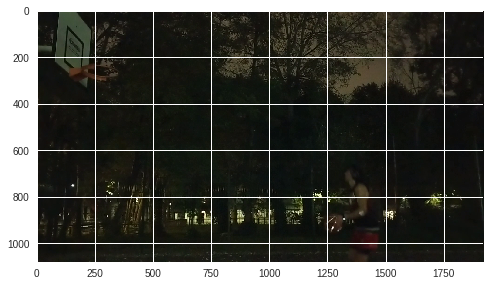

In [21]:
plt.imshow(video_data[90])

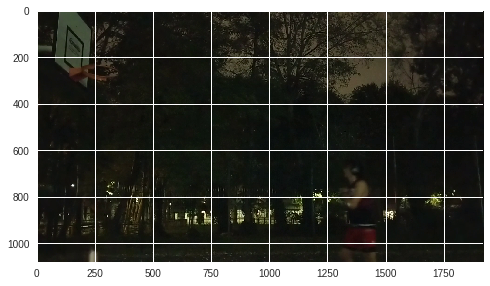

In [24]:
plt.imshow(video_data[150])

In [0]:
def rgb_to_gray(rgb):
  

    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [0]:
for 

In [0]:
trimmed_video = rgb_to_gray(video_data[90:150])

In [71]:
trimmed_video.shape

(60, 1080, 1920)

In [0]:
deltas = abs( trimmed_video[1:] - trimmed_video[:-1])

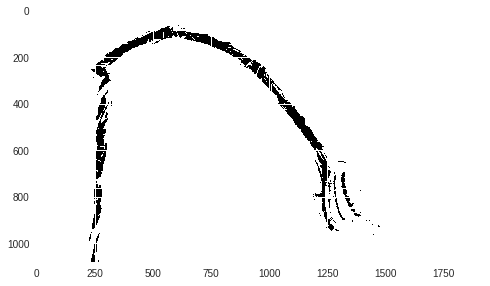

In [148]:
trail_mask = np.zeros(trimmed_video.shape[1:])

for frame in deltas:
  trail_mask = np.logical_or(trail_mask, frame>50)
plt.imshow(trail_mask)

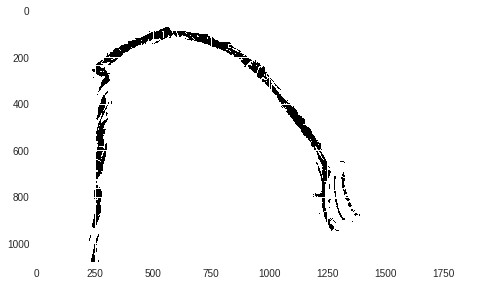

In [0]:
trail_color = [200,200,180]

In [141]:
(edit_frame + np.full((1080,1920,3), trail_color) ).shape

(1080, 1920, 3)

In [142]:
np.max(video_data[101])

255

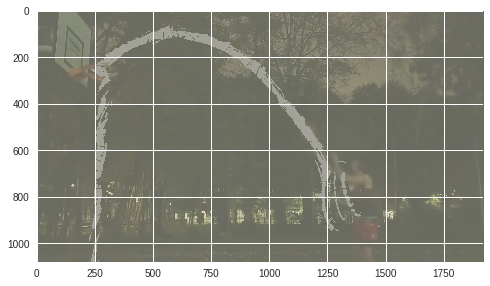

In [143]:
plt.imshow(((video_data[101].astype(np.uint32) + trail_color)/2).astype(np.uint8))

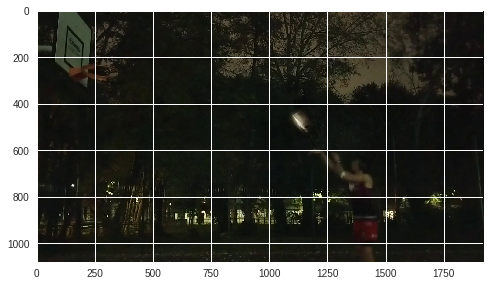

In [144]:
plt.imshow(video_data[102])

In [0]:
import matplotlib.pylab as pylb

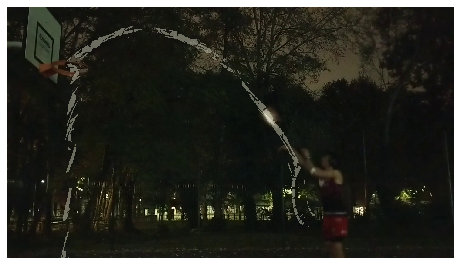

In [147]:
edit_frame = video_data[102].copy()
edit_frame[trail_mask] = ((edit_frame.astype(np.uint32) + trail_color)/2 )[trail_mask].astype(np.uint8)
plt.imshow(edit_frame)
plt.grid(False)
plt.xticks([])
plt.yticks([])
pylb.savefig('foo.png', dpi=300)

In [50]:
np.max( trail_mask[0])

11.9512

In [57]:
(trail_mask[10]>0).sum()

2441

In [68]:
(trail_mask[20]>0).shape

(1080, 3)

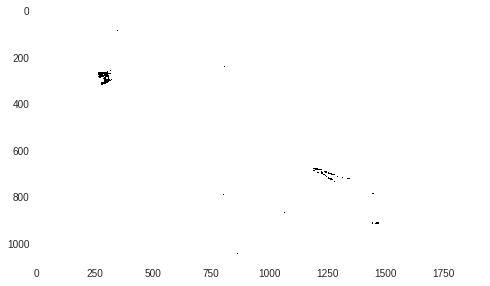

In [77]:
plt.imshow(trail_mask[40]>20, interpolation='nearest')

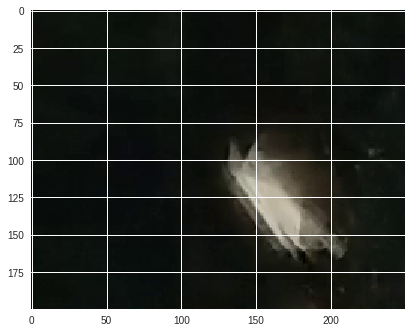

In [20]:
plt.imshow(video_data[101, 400:600, 1000:1250])